In [84]:
import pandas as pd
import random
import base64
from io import BytesIO
from IPython.display import HTML
import os

Error processing C:/Users/Gaming/Desktop/Lab4/res2\ar.txt: cannot identify image file 'C:/Users/Gaming/Desktop/Lab4/res2\\ar.txt'
Error processing C:/Users/Gaming/Desktop/Lab4/res2\text.txt: cannot identify image file 'C:/Users/Gaming/Desktop/Lab4/res2\\text.txt'



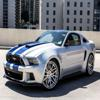
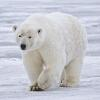
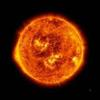
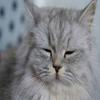
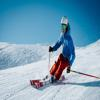
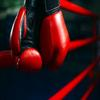
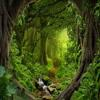
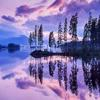
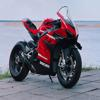
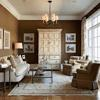
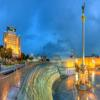
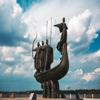
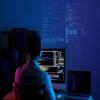
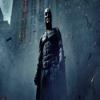

In [85]:
def thumbnail(path):
    with Image.open(path) as i:
        i.thumbnail((150, 150), Image.LANCZOS)
        return i

def image_formatter(im):
    def image_base64(im):
        with BytesIO() as buffer:
            im.save(buffer, 'jpeg')
            return base64.b64encode(buffer.getvalue()).decode()

    if isinstance(im, str):
        im = thumbnail(im)

    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

def process_image(file_path):
    try:
        with Image.open(file_path) as img:
            img_format = img.format
            img_mode = img.mode
            img_size = os.path.getsize(file_path) / (1024 * 1024)  # in megabytes
            img_size = round(img_size, 2)
            img_channels = len(img.getbands())
            img_width, img_height = img.size
            reduced_img = img.resize((100, 100))  # change the size as needed
            return {
                'File Name': os.path.basename(file_path),
                'Color Model': img_mode,
                'Format': img_format,
                'Channels': img_channels,
                'File Size (MB)': img_size,
                'Width': img_width,
                'Height': img_height,
                'Full Path': file_path,
                'Image': image_formatter(reduced_img)
            }
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def get_image_info(folder_path):
    image_data = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        if os.path.isfile(file_path):
            processed_image = process_image(file_path)
            if processed_image:
                image_data.append(processed_image)

    df = pd.DataFrame(image_data)
    return df

folder_path = "C:/Users/Gaming/Desktop/Lab4/res2"
img_set = get_image_info(folder_path)
HTML(img_set.to_html(formatters={'Image': lambda x: x}, escape=False))


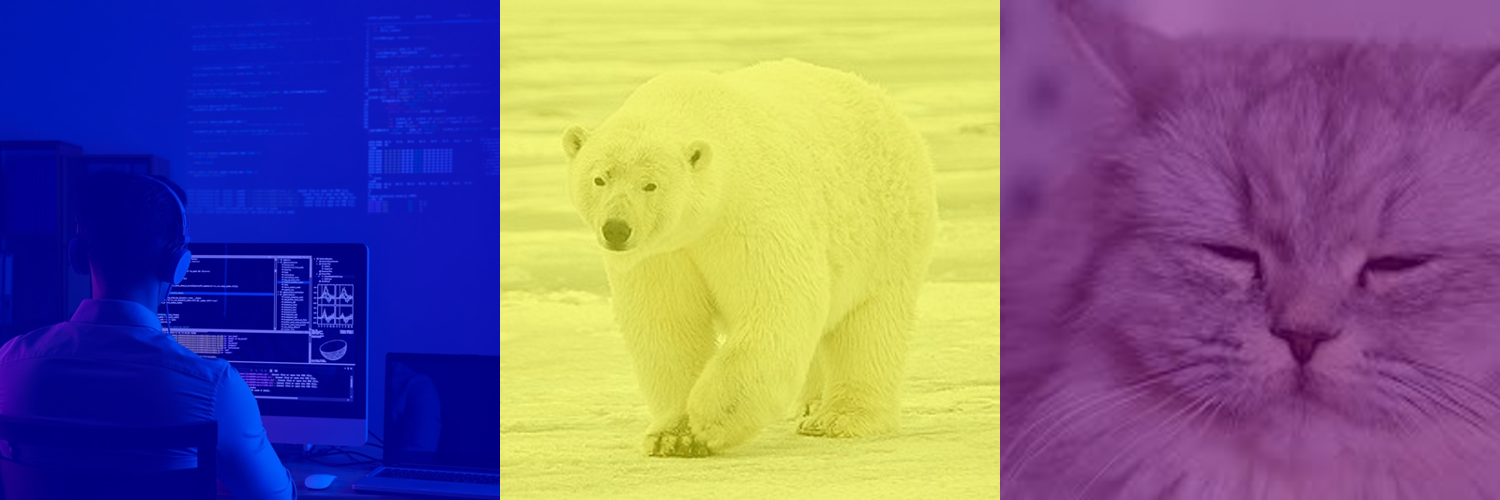

In [91]:
import os
import random
from PIL import Image, ImageOps


def crop_and_resize(image, target_size):
    width, height = image.size
    new_size = min(width, height)
    left = (width - new_size) // 2
    top = (height - new_size) // 2
    right = (width + new_size) // 2
    bottom = (height + new_size) // 2

    cropped_image = image.crop((left, top, right, bottom))
    resized_image = cropped_image.resize((target_size, target_size))

    return resized_image

def apply_random_color_filter(image):
    filters = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#800080', '#00FFFF']
    selected_filter = random.choice(filters)
    colorized_image = ImageOps.colorize(image.convert("L"), selected_filter, selected_filter)
    blended_image = Image.blend(image, colorized_image.convert("RGB"), alpha=0.5)

    return blended_image

def get_random_image_path(folder_path):
    image_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_path = os.path.join(folder_path, random.choice(image_files))

    return image_path

def process_image(image_path):
    try:
        image = Image.open(image_path)
        image = crop_and_resize(image, 533)
        image = image.resize((500, 500))
        image = apply_random_color_filter(image)

        return image

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def create_poster(folder_path, output_name, columns, rows):
    images = []

    for _ in range(columns * rows):
        random_image_path = get_random_image_path(folder_path)
        processed_image = process_image(random_image_path)

        if processed_image:
            images.append(processed_image)

    total_images = len(images)
    required_images = columns * rows

    if total_images < required_images:
        print(f"Not enough images to create the poster. Expected {required_images}, found {total_images}.")
        return

    poster = Image.new('RGB', (columns * 500, rows * 500))

    for i in range(rows):
        for j in range(columns):
            index = i * columns + j
            poster.paste(images[index], (j * 500, i * 500))

    poster.save(output_name + '.png')
    return poster

folder_path = "./res2"
create_poster(folder_path, 'poster1', 3, 1)


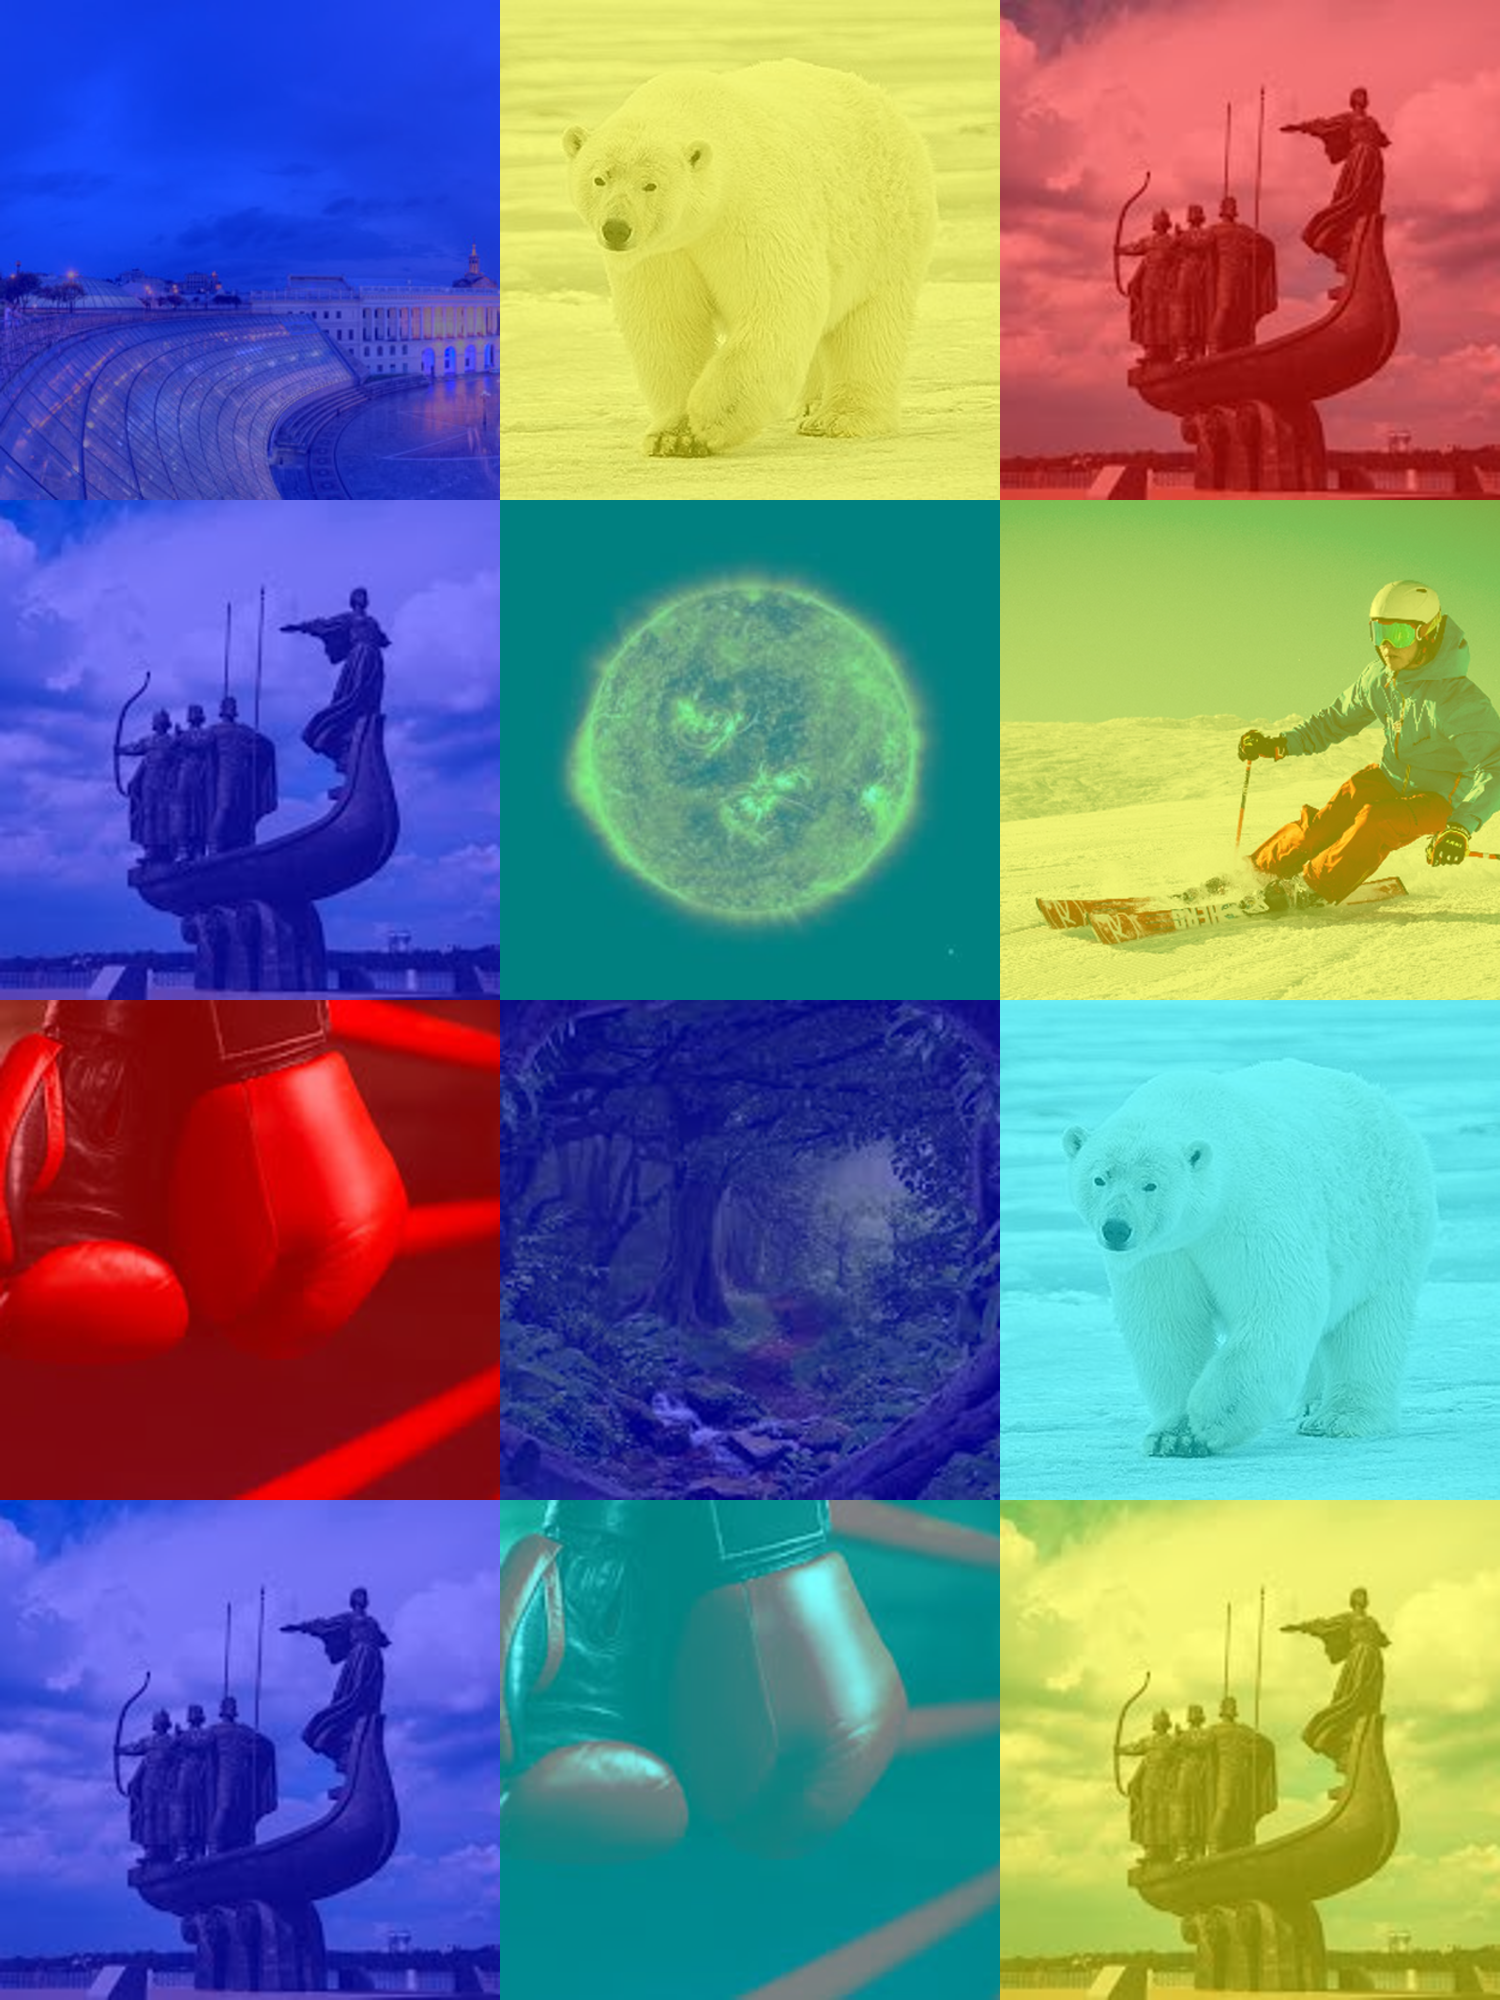

In [92]:
create_poster(folder_path, 'poster2', 3, 4)


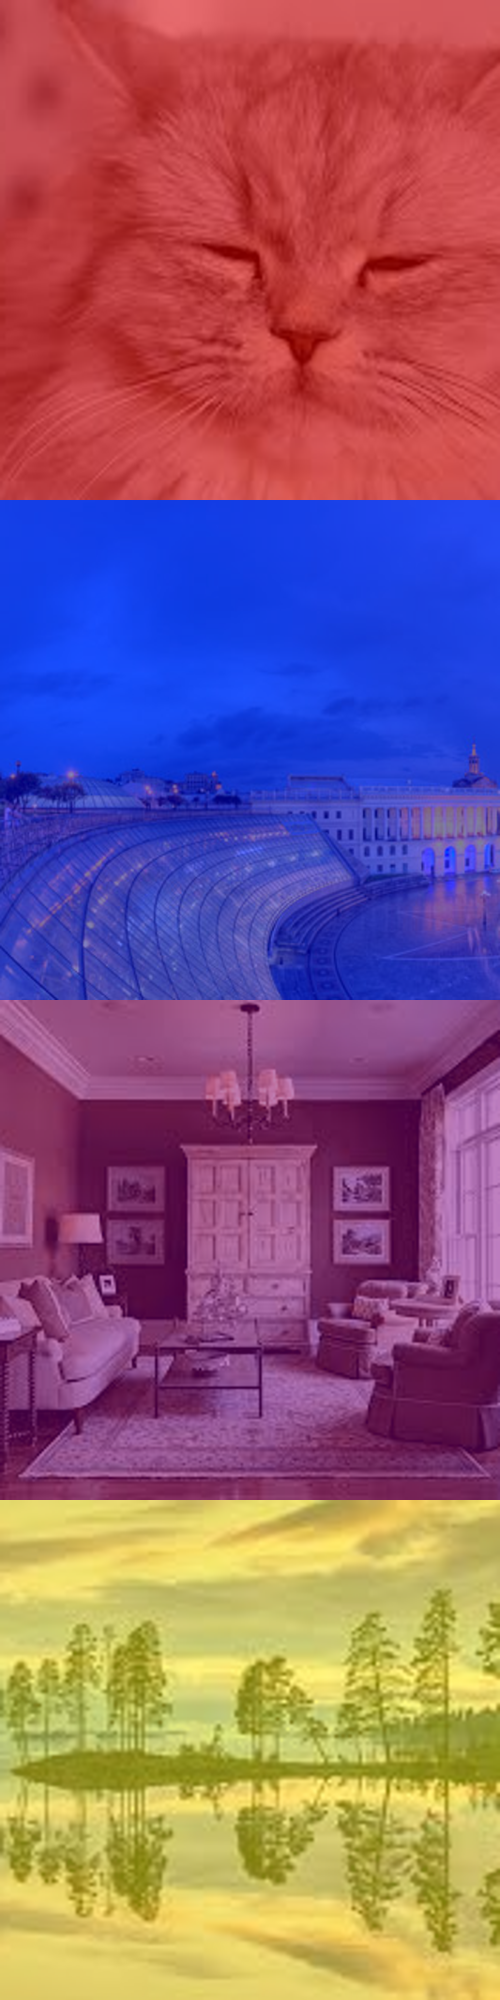

In [94]:
create_poster(folder_path, 'poster3', 1, 4)